In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Aluno: Pedro Leinos Falcão Cunha
# Matrícula: 542114

# Questão 3

mu em T = 7.5 ºC = 1.4068632289341518


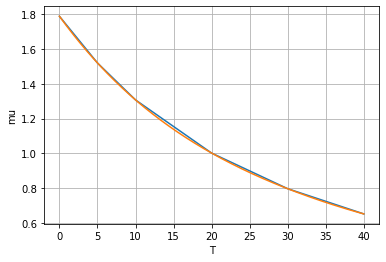

In [130]:
def lagrange_interpolation(x0, xroots, yroots):
    n = len(xroots)
    result = 0

    for k in range(n):
        prod = 1

        for j in range(n):
            if j != k:
                prod *= (x0 - xroots[j]) / (xroots[k] - xroots[j])

        result += yroots[k] * prod

    return result


T = [0, 5, 10, 20, 30, 40]
mu = [1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529]

t0 = 7.5

mu_t0 = lagrange_interpolation(t0, T, mu)

print(f'mu em T = 7.5 ºC = {mu_t0}')

t_s = np.linspace(T[0], T[-1], 1001)
mu_s = lagrange_interpolation(t_s, T, mu)

plt.plot(T, mu)
plt.plot(t_s, mu_s)
plt.xlabel('T')
plt.ylabel('mu')
plt.grid()
plt.show()

# Questão 4

In [150]:
def trapezium(x, y):
    result = 0

    for i in range(len(y) - 1):
        result += (x[i + 1] - x[i]) / 2 * (y[i] + y[i + 1])

    return result

def simpson_13(x, y):
    result = 0
    X = np.c_[x[:-2:2], x[1:-1:2], x[2::2]]
    Y = np.c_[y[:-2:2], y[1:-1:2], y[2::2]]

    for xi, yi in zip(X, Y):
        h = (xi[2] - xi[0]) / 2
        result += (h / 3) * (yi[0] + 4 * yi[1] + yi[2])

    return result

def simpson_38(x, y):
    result = 0
    X = np.c_[x[:-3:3], x[1:-2:3], x[2:-1:3], x[3::3]]
    Y = np.c_[y[:-3:3], y[1:-2:3], y[2:-1:3], y[3::3]]

    for xi, yi in zip(X, Y):
        h = (xi[3] - xi[0]) / 3
        result += (3 * h / 8) * (yi[0] + 3 * yi[1] + 3 * yi[2] + yi[3])

    return result

tempo = np.array([0, 0.5, 1, 1.5, 48, 48.5, 49, 59, 69, 79])
veloc = np.array([62., 74., 73.5, 60.5, 49.5,  42.5, 39, 44.5, 58, 61.5]) / 3.6

result = 0
        
tempo_trapz1 = np.array([0, 0.5, 1, 1.5, 48])
veloc_trapz1 = np.array([62., 74., 73.5, 60.5, 49.5]) / 3.6
tempo_trapz2 = np.array([48, 48.5, 49,])
veloc_trapz2 = np.array([49.5,  42.5, 39]) / 3.6

result += trapezium(tempo_trapz1, veloc_trapz1)
result += trapezium(tempo_trapz2, veloc_trapz2)

tempo_38 = np.array([1.5, 48])
veloc_38 = np.array([60.5, 49.5]) / 3.6

result += simpson_38(tempo_38, veloc_38)

tempo_13 = np.array([48, 49, 59, 69, 79])
veloc_13 = np.array([42.5, 39, 44.5, 58, 61.5]) / 3.6

result += simpson_13(tempo_13, veloc_13)

print(f'comprimento da pista (m) = {result}')

comprimento da pista (m) = 1188.1712962962963
